In [715]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [716]:
building_permits_2019 = pd.read_csv(
    "../Data/Building_Permits_in_2019.csv", low_memory=False
)
building_permits_2020 = pd.read_csv("../Data/Building_Permits_in_2020.csv")
building_permits_2021 = pd.read_csv("../Data/Building_Permits_in_2021.csv")
building_permits_2022 = pd.read_csv("../Data/Building_Permits_in_2022.csv")
building_permits_2023 = pd.read_csv("../Data/Building_Permits_in_2023.csv")
building_permits = pd.concat(
    [
        building_permits_2019,
        building_permits_2020,
        building_permits_2021,
        building_permits_2022,
        building_permits_2023,
    ],
    axis=0,
)


In [717]:
building_permits.shape


(207645, 44)

In [718]:
building_permits.columns

Index(['X', 'Y', 'OBJECTID', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'APPLICATION_STATUS_NAME', 'FULL_ADDRESS', 'DESC_OF_WORK', 'SSL',
       'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE', 'FEES_PAID', 'OWNER_NAME',
       'LASTMODIFIEDDATE', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'DCSTATADDRESSKEY',
       'DCSTATLOCATIONKEY', 'WARD', 'ANC', 'SMD', 'DISTRICT', 'PSA',
       'NEIGHBORHOODCLUSTER', 'HOTSPOT2006NAME', 'HOTSPOT2005NAME',
       'HOTSPOT2004NAME', 'BUSINESSIMPROVEMENTDISTRICT', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')

In [719]:
building_permits.isnull().sum()


X                                   0
Y                                   0
OBJECTID                            0
DCRAINTERNALNUMBER                  0
ISSUE_DATE                          0
PERMIT_ID                           0
PERMIT_TYPE_NAME                    0
PERMIT_SUBTYPE_NAME              1373
PERMIT_CATEGORY_NAME           195567
APPLICATION_STATUS_NAME             0
FULL_ADDRESS                        0
DESC_OF_WORK                   127245
SSL                              6871
ZONING                          14957
PERMIT_APPLICANT                98525
FEE_TYPE                         9284
FEES_PAID                           0
OWNER_NAME                       8127
LASTMODIFIEDDATE                    0
CITY                           207645
STATE                          207645
LATITUDE                            0
LONGITUDE                           0
XCOORD                              0
YCOORD                              0
ZIPCODE                        207645
MARADDRESSRE

In [720]:
building_permits["APPLICATION_STATUS_NAME"].unique()


array(['PERMIT ISSUED', 'COMPLETED', 'PERMIT CANCELED',
       'APPLICATION CANCELED', 'APPLICATION ACCEPTED',
       'CONTRACTOR INFORMATION MI', 'PERMIT REVOKED', 'REVEIW IN PROCESS',
       'REVIEW IN PROCESS', 'COST REVIEW APPROVED',
       'APPLICATION APPROVED', 'COST REVIEW - NOT REQUIRE',
       'READY FOR ISSUANCE', 'PAYMENT PENDING', 'PERMIT WITHDRAWN',
       'PROJECTDOX UNDER REVIEW', 'RAZE FINAL APPROVED - CLO',
       'REVIEW APPROVED', 'APPLICATION INCOMPLETE', 'PERMIT APPROVED',
       'REVIEW IN PROGRESS', 'APPLICATION SCREENING',
       'APPLICATION PENDING'], dtype=object)

In [721]:
building_permits = building_permits[
    building_permits["APPLICATION_STATUS_NAME"] == "COMPLETED"
]


In [722]:
building_permits.shape


(48449, 44)

In [723]:
# dropping entirely null columns
building_permits.dropna(axis=1, how="all", inplace=True)


In [724]:
building_permits.shape


(48449, 36)

In [725]:
building_permits.columns


Index(['X', 'Y', 'OBJECTID', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'APPLICATION_STATUS_NAME', 'FULL_ADDRESS', 'DESC_OF_WORK', 'SSL',
       'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE', 'FEES_PAID', 'OWNER_NAME',
       'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE', 'XCOORD', 'YCOORD',
       'MARADDRESSREPOSITORYID', 'WARD', 'ANC', 'SMD', 'DISTRICT', 'PSA',
       'NEIGHBORHOODCLUSTER', 'BUSINESSIMPROVEMENTDISTRICT', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')

In [726]:
# Remove unnecessary columns
columns_to_drop = [
    "X",
    "Y",
    "XCOORD",
    "YCOORD",
    "OBJECTID",  # Not Useful in the analysis
    "GLOBALID",  # Not Useful in the analysis
    "CREATED_USER",  # Not Useful in the analysis
    "LAST_EDITED_USER",  # Not Useful in the analysis
    "DCRAINTERNALNUMBER",  # Not Useful in the analysis
    "APPLICATION_STATUS_NAME",  # As we are keeping obeservations APPLICATION_STATUS_NAME == 'Permit Issued'
    "BUSINESSIMPROVEMENTDISTRICT",  # mostly nulls
    "CREATED_DATE",  # it is the csv file generation date which is not useful
    "LAST_EDITED_DATE",  # it is the csv file generation date which is not useful
    "MARADDRESSREPOSITORYID", # removed as it's an internal address repository ID that does not provide useful information for predicting construction duration.
    "MARADDRESSREPOSITORYID", # removed as it's an internal address repository ID that does not provide useful information for predicting construction duration.
    "ANC", # removed because it represents Advisory Neighborhood Commissions, which are smaller than wards and provide similar location information. We decided to use wards for simplicity.
    "SMD", # removed because it represents Single Member Districts, which are smaller than wards and provide similar location information. We decided to use wards for simplicity.
    "PSA", # removed because it represents Police Service Areas, which are unrelated to construction duration
    "FULL_ADDRESS", # removed because it is the exact address where the construction is happpening
    'NEIGHBORHOODCLUSTER', # as they are smaller than wards and provide similar location information. We decided to use wards for simplicity.

]
building_permits.drop(columns=columns_to_drop, inplace=True)


In [727]:
building_permits.shape


(48449, 17)

In [728]:
building_permits.isnull().sum()


ISSUE_DATE                  0
PERMIT_ID                   0
PERMIT_TYPE_NAME            0
PERMIT_SUBTYPE_NAME         0
PERMIT_CATEGORY_NAME    47959
DESC_OF_WORK            33727
SSL                       421
ZONING                   3987
PERMIT_APPLICANT        27823
FEE_TYPE                 2609
FEES_PAID                   0
OWNER_NAME                431
LASTMODIFIEDDATE            0
LATITUDE                    0
LONGITUDE                   0
WARD                        0
DISTRICT                    0
dtype: int64

In [729]:
# PERMIT_CATEGORY_NAME      47959
# DESC_OF_WORK              33727
# SSL                         421
# ZONING                     3987
# PERMIT_APPLICANT          27823
# FEE_TYPE                   2609
# OWNER_NAME                  431
# This are columns with lots of null values and handling them is not possible so removing those
columns_to_drop = [
    "PERMIT_CATEGORY_NAME",
    "DESC_OF_WORK",
    "SSL",
    "ZONING",
    "PERMIT_APPLICANT",
    "FEE_TYPE",
    "OWNER_NAME",
]
building_permits.drop(columns=columns_to_drop, inplace=True)


In [730]:
building_permits.head()


,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,FEES_PAID,LASTMODIFIEDDATE,LATITUDE,LONGITUDE,WARD,DISTRICT
37,2019/03/28 04:00:00+00,M1902000,SUPPLEMENTAL,MECHANICAL,101,2023/04/08 13:49:35+00,38.912777,-77.031700,2,THIRD
38,2019/03/28 04:00:00+00,M1902002,SUPPLEMENTAL,MECHANICAL,51,2023/04/15 13:49:19+00,38.900355,-77.045776,2,SECOND
39,2019/03/28 04:00:00+00,M1902006,SUPPLEMENTAL,MECHANICAL,51,2023/04/15 13:49:19+00,38.959702,-77.016441,4,FOURTH
40,2019/03/29 04:00:00+00,M1902013,SUPPLEMENTAL,MECHANICAL,51,2023/04/15 13:49:19+00,38.905449,-76.973679,5,FIFTH
41,2019/03/29 04:00:00+00,M1902015,SUPPLEMENTAL,MECHANICAL,515,2023/04/15 13:49:19+00,38.879907,-77.022939,6,FIRST


In [731]:
building_permits.shape

(48449, 10)

In [732]:
building_permits.columns

Index(['ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME',
       'FEES_PAID', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE', 'WARD',
       'DISTRICT'],
      dtype='object')

In [733]:
building_permits.isnull().sum()

ISSUE_DATE             0
PERMIT_ID              0
PERMIT_TYPE_NAME       0
PERMIT_SUBTYPE_NAME    0
FEES_PAID              0
LASTMODIFIEDDATE       0
LATITUDE               0
LONGITUDE              0
WARD                   0
DISTRICT               0
dtype: int64

In [734]:
building_permits[['ISSUE_DATE', 'LASTMODIFIEDDATE']]

,ISSUE_DATE,LASTMODIFIEDDATE
37,2019/03/28 04:00:00+00,2023/04/08 13:49:35+00
38,2019/03/28 04:00:00+00,2023/04/15 13:49:19+00
39,2019/03/28 04:00:00+00,2023/04/15 13:49:19+00
40,2019/03/29 04:00:00+00,2023/04/15 13:49:19+00
41,2019/03/29 04:00:00+00,2023/04/15 13:49:19+00
...,...,...
10120,2023/02/07 05:00:00+00,2023/03/26 13:57:37+00
10127,2023/02/09 05:00:00+00,2023/03/25 14:03:42+00
10134,2023/01/11 05:00:00+00,2023/03/24 13:59:29+00
10145,2023/02/03 05:00:00+00,2023/03/26 13:57:37+00


In [735]:
building_permits['ISSUE_DATE'] = pd.to_datetime(building_permits['ISSUE_DATE'])
building_permits['LASTMODIFIEDDATE'] = pd.to_datetime(building_permits['LASTMODIFIEDDATE'])

In [736]:
building_permits["LASTMODIFIEDDATE"].dt.year.unique()

array([2023, 2021, 2022], dtype=int64)

In [737]:
building_permits["ISSUE_DATE"].dt.year.unique()

array([2019, 2020, 2021, 2022, 2023], dtype=int64)

In [738]:
building_permits.columns

Index(['ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME',
       'FEES_PAID', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE', 'WARD',
       'DISTRICT'],
      dtype='object')

In [739]:
# Rename columns
building_permits = building_permits.rename(columns={
    'ISSUE_DATE': 'start_date',
    'PERMIT_ID': 'permit_id',
    'PERMIT_TYPE_NAME': 'permit_type',
    'PERMIT_SUBTYPE_NAME': 'permit_subtype',
    'FEES_PAID': 'fees_paid',
    'LASTMODIFIEDDATE': 'completion_date',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'WARD': 'ward',
    'DISTRICT': 'district',
})

| Column Name      | Description                                                                                  |
|------------------|----------------------------------------------------------------------------------------------|
| start_date       | The date when the construction permit was issued.                                            |
| permit_id        | A unique identifier for the construction permit.                                             |
| permit_type      | A general category for the type of construction work.                                        |
| permit_subtype   | A more specific category within the permit type.                                             |
| fees_paid        | The total amount of fees paid for the construction permit.                                   |
| completion_date  | The date when the construction work was completed (or last modified).                        |
| latitude         | The latitude of the construction site.                                                       |
| longitude        | The longitude of the construction site.                                                      |
| ward             | The administrative division of the construction site.                                        |
| district         | The district of the construction site.                                                       |


In [740]:
building_permits.columns

Index(['start_date', 'permit_id', 'permit_type', 'permit_subtype', 'fees_paid',
       'completion_date', 'latitude', 'longitude', 'ward', 'district'],
      dtype='object')

In [741]:
building_permits['duration'] = (building_permits['completion_date'] - building_permits['start_date']).dt.days

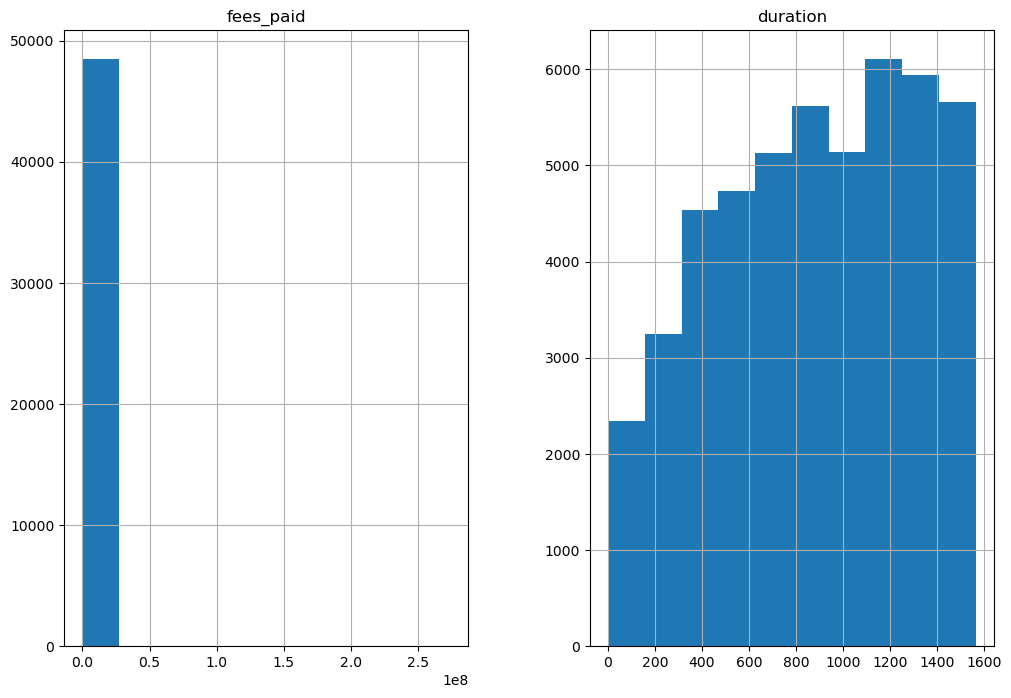

In [742]:
numeric_vars = ['fees_paid', 'duration']
building_permits[numeric_vars].hist(figsize=(12, 8))
plt.show()

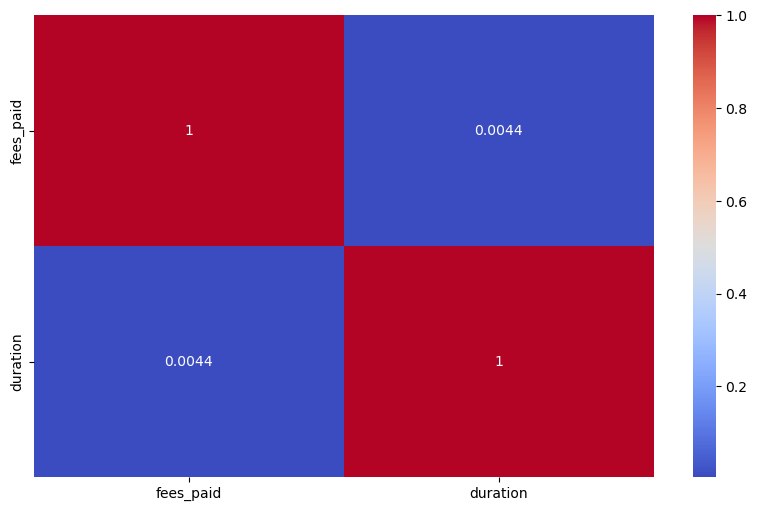

In [743]:
plt.figure(figsize=(10, 6))
sns.heatmap(building_permits[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

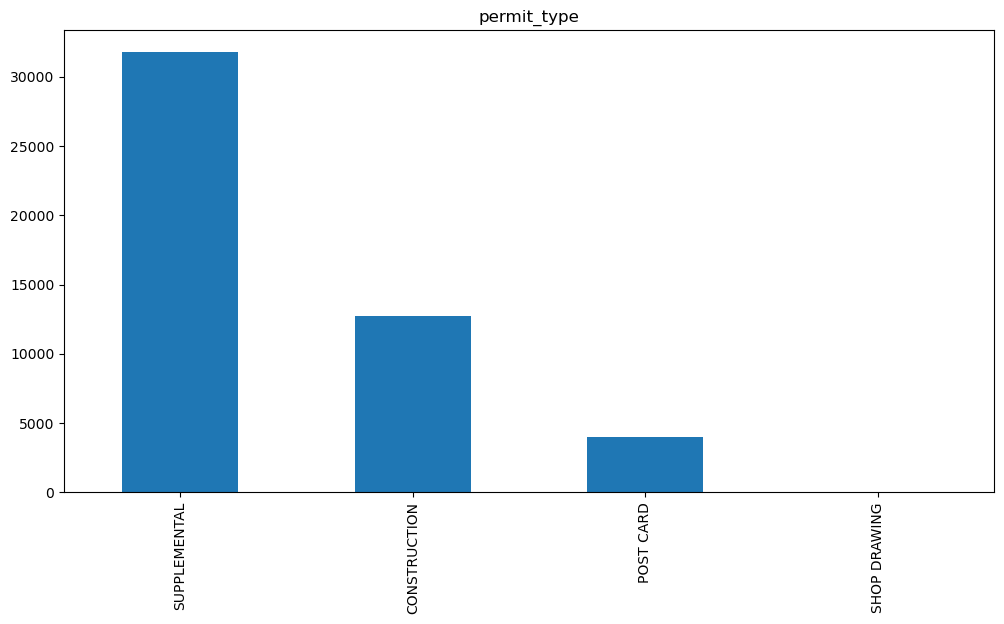

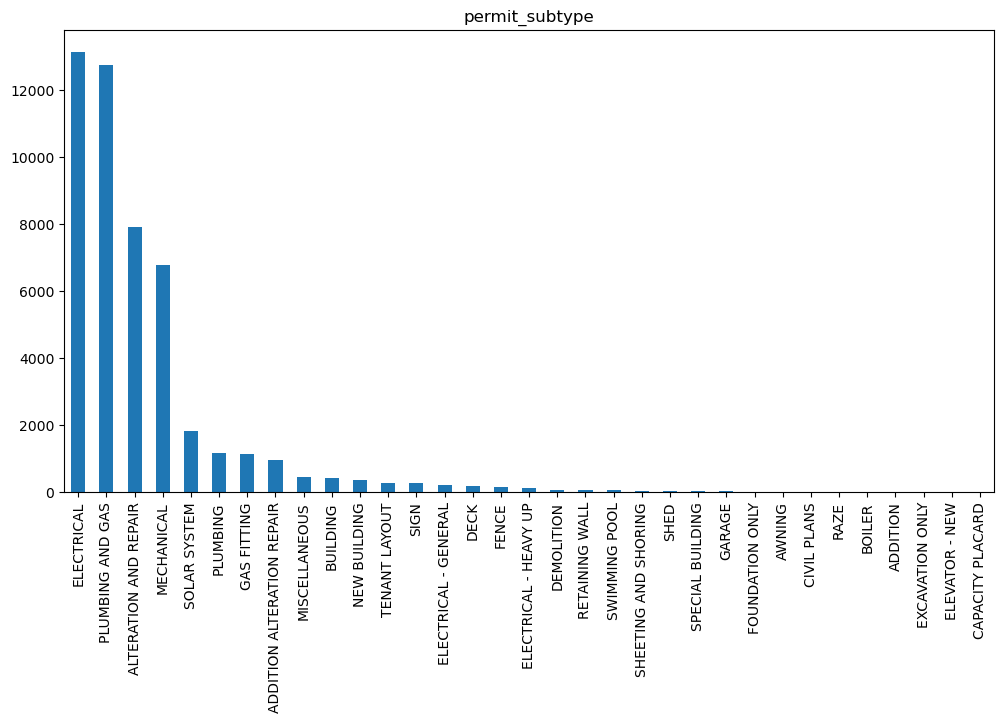

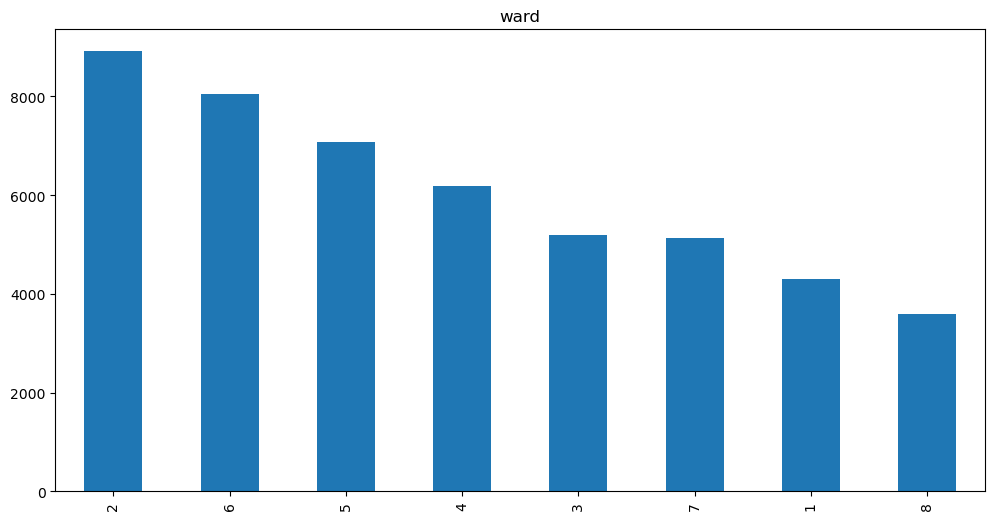

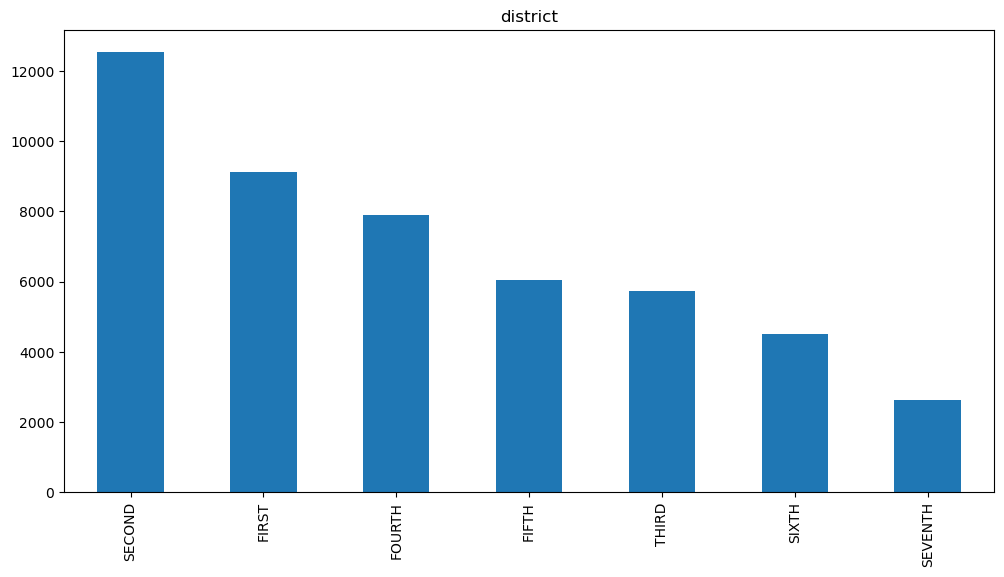

In [744]:
categorical_vars = ['permit_type', 'permit_subtype', 'ward', 'district',]

for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    building_permits[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()


In [745]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Remove outliers in the 'duration' column
# building_permits = remove_outliers_iqr(building_permits, 'duration')

In [746]:
without_outliers_df = remove_outliers_iqr(building_permits, 'duration')

In [747]:
without_outliers_df.shape

(48449, 11)

In [748]:
building_permits.shape

(48449, 11)

In [749]:
building_permits["fees_paid"]

37       101
38        51
39        51
40        51
41       515
        ... 
10120     29
10127     29
10134     22
10145     29
10148     29
Name: fees_paid, Length: 48449, dtype: int64

In [750]:
without_outliers_df = remove_outliers_iqr(building_permits, 'fees_paid')

In [751]:
without_outliers_df.shape

(42009, 11)

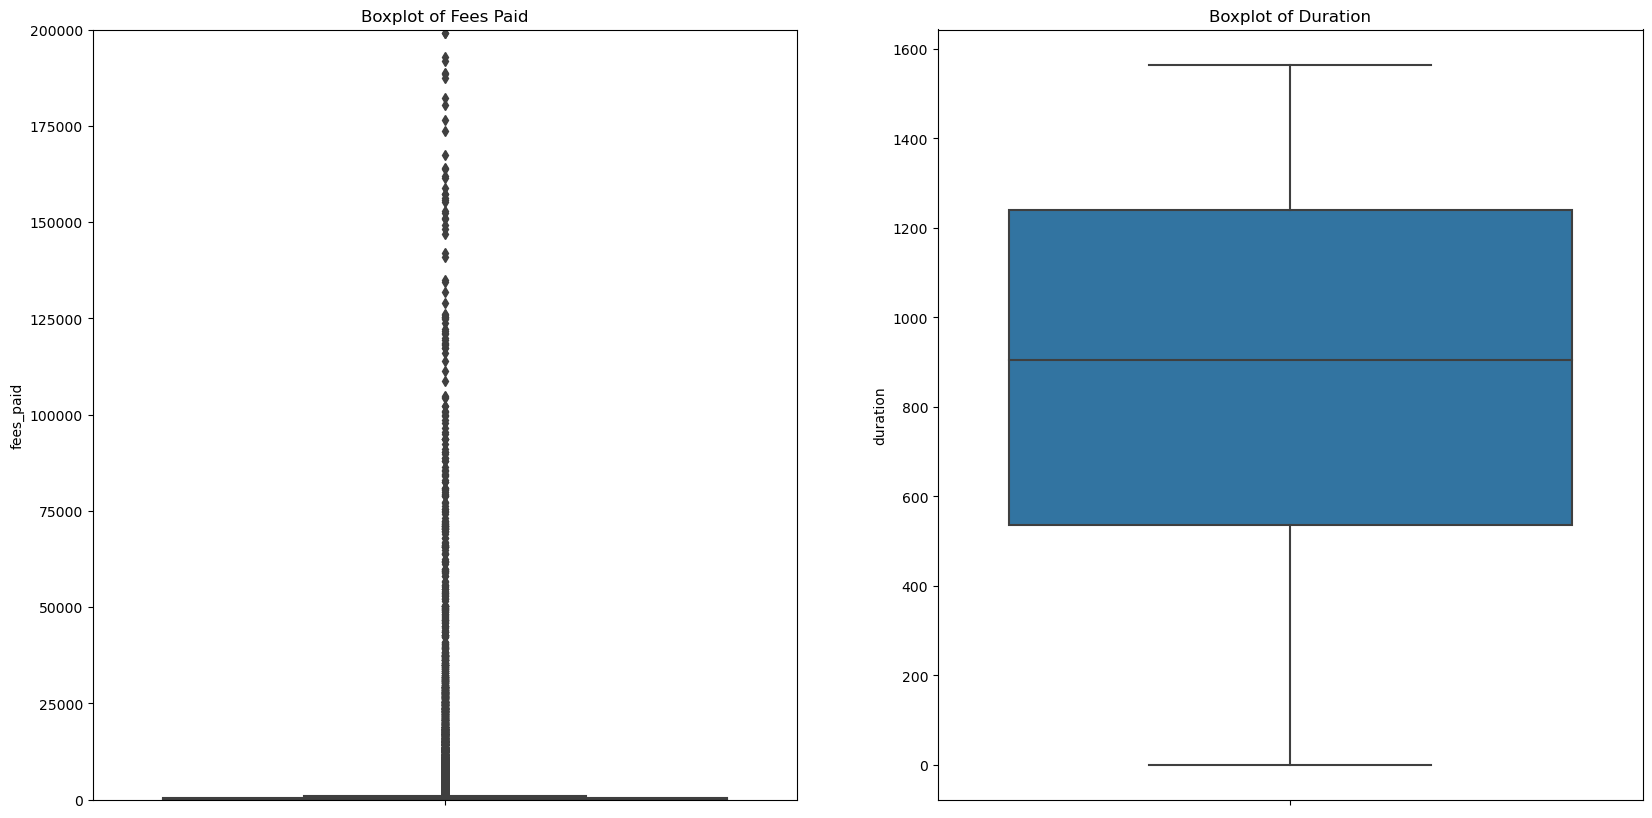

In [752]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=building_permits, y='fees_paid')
plt.ylim(0,200000)
plt.title('Boxplot of Fees Paid')

plt.subplot(1, 2, 2)
sns.boxplot(data=building_permits, y='duration')
plt.title('Boxplot of Duration')

plt.show()

In [753]:
building_permits["fees_paid"].max() 

274113370

In [754]:
# building_permits[building_permits["fees_paid"]>=200000].shape

In [755]:
building_permits = remove_outliers_iqr(building_permits, 'fees_paid')

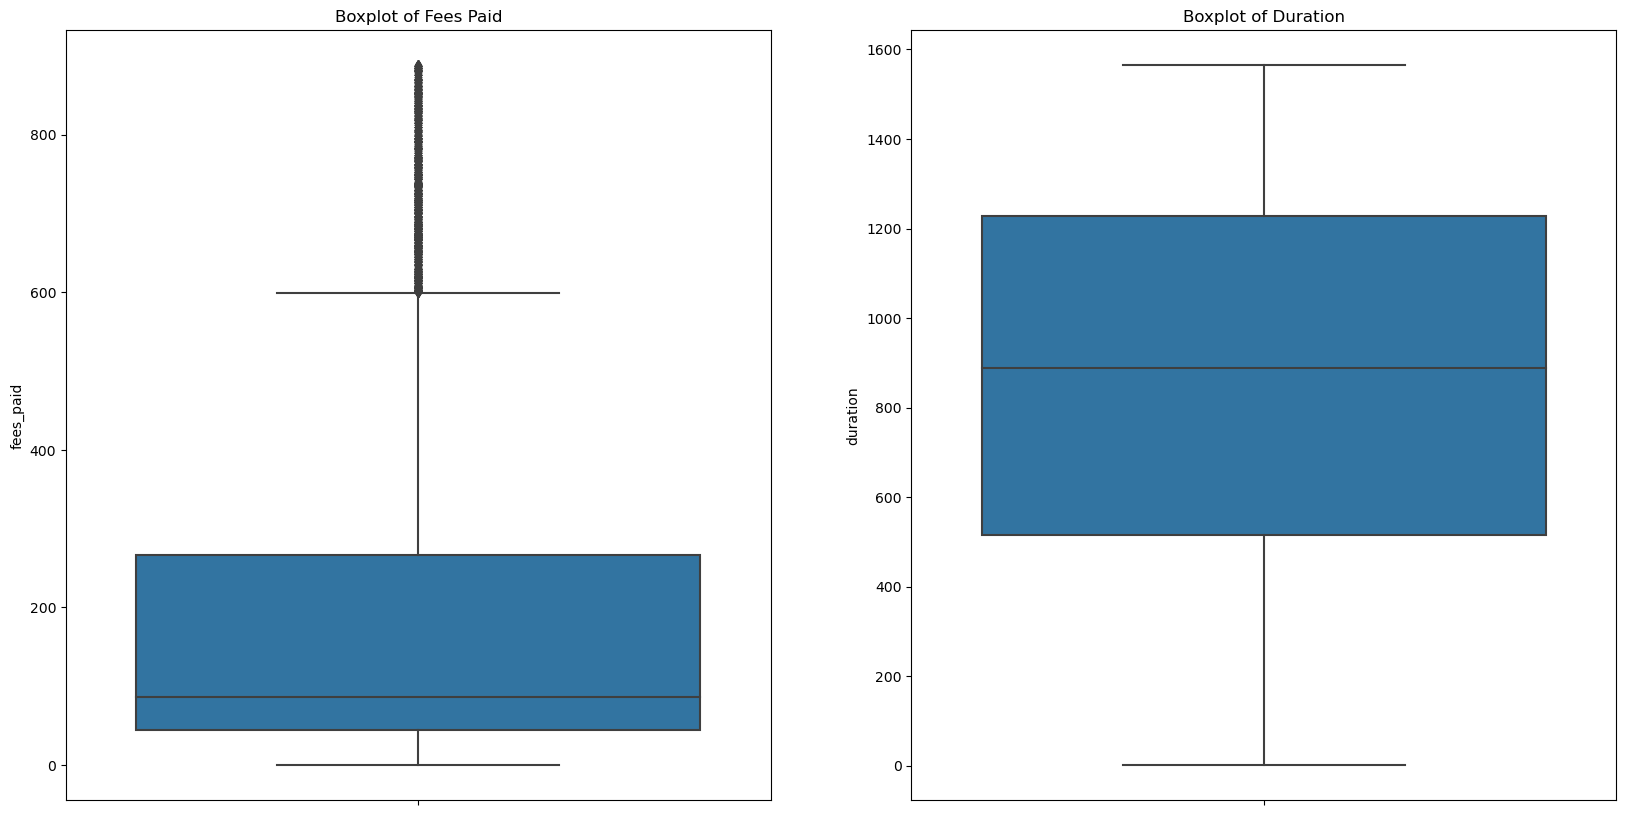

In [756]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=building_permits, y='fees_paid')
# plt.ylim(0,200000)
plt.title('Boxplot of Fees Paid')

plt.subplot(1, 2, 2)
sns.boxplot(data=building_permits, y='duration')
plt.title('Boxplot of Duration')

plt.show()

In [757]:
building_permits.shape

(42009, 11)

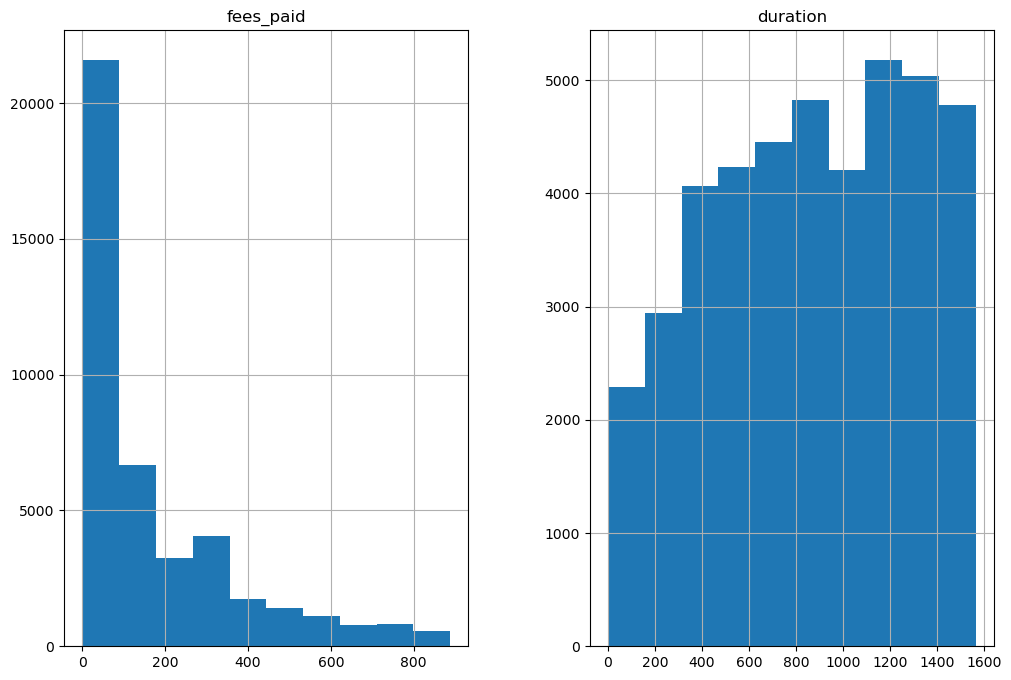

In [758]:
numeric_vars = ['fees_paid', 'duration']
building_permits[numeric_vars].hist(figsize=(12, 8))
plt.show()

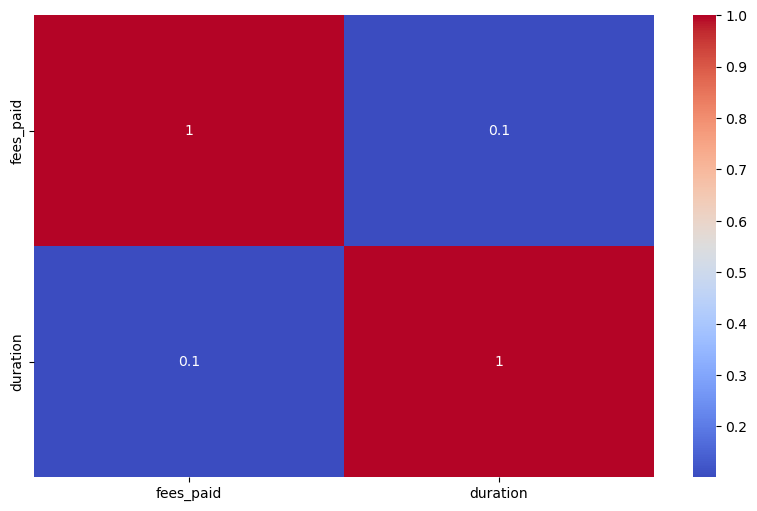

In [759]:
plt.figure(figsize=(10, 6))
sns.heatmap(building_permits[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

In [760]:
building_permits_encoded = pd.get_dummies(building_permits, columns=categorical_vars, drop_first=True)


In [761]:
building_permits_encoded.head()

,start_date,permit_id,fees_paid,completion_date,latitude,longitude,duration,permit_type_POST CARD,permit_type_SHOP DRAWING,permit_type_SUPPLEMENTAL,...,ward_5,ward_6,ward_7,ward_8,district_FIRST,district_FOURTH,district_SECOND,district_SEVENTH,district_SIXTH,district_THIRD
37,2019-03-28 04:00:00+00:00,M1902000,101,2023-04-08 13:49:35+00:00,38.912777,-77.031700,1472,0,0,1,...,0,0,0,0,0,0,0,0,0,1
38,2019-03-28 04:00:00+00:00,M1902002,51,2023-04-15 13:49:19+00:00,38.900355,-77.045776,1479,0,0,1,...,0,0,0,0,0,0,1,0,0,0
39,2019-03-28 04:00:00+00:00,M1902006,51,2023-04-15 13:49:19+00:00,38.959702,-77.016441,1479,0,0,1,...,0,0,0,0,0,1,0,0,0,0
40,2019-03-29 04:00:00+00:00,M1902013,51,2023-04-15 13:49:19+00:00,38.905449,-76.973679,1478,0,0,1,...,1,0,0,0,0,0,0,0,0,0
41,2019-03-29 04:00:00+00:00,M1902015,515,2023-04-15 13:49:19+00:00,38.879907,-77.022939,1478,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [762]:
building_permits_encoded.shape

(42009, 55)

In [763]:
correlation_matrix = building_permits_encoded.drop(columns=['latitude', 'longitude']).corr()

C:\Users\meetd\AppData\Local\Temp\ipykernel_13944\1666257570.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = building_permits_encoded.drop(columns=['latitude', 'longitude']).corr()


In [764]:
correlation_matrix.head()

,fees_paid,duration,permit_type_POST CARD,permit_type_SHOP DRAWING,permit_type_SUPPLEMENTAL,permit_subtype_ADDITION ALTERATION REPAIR,permit_subtype_ALTERATION AND REPAIR,permit_subtype_AWNING,permit_subtype_BOILER,permit_subtype_BUILDING,...,ward_5,ward_6,ward_7,ward_8,district_FIRST,district_FOURTH,district_SECOND,district_SEVENTH,district_SIXTH,district_THIRD
fees_paid,1.000000,0.101082,-0.233515,-0.003563,-0.093578,0.056401,0.177634,0.002958,0.000114,-0.072640,...,0.004982,0.006534,0.000220,0.024287,0.015025,-0.014684,-0.024366,0.017398,-0.006072,0.002204
duration,0.101082,1.000000,-0.056129,0.001018,0.027201,0.025623,0.025285,-0.003478,0.002528,0.020107,...,0.009153,0.017807,-0.018485,0.007632,0.018246,-0.025692,-0.004685,0.006373,-0.018493,0.014859
permit_type_POST CARD,-0.233515,-0.056129,1.000000,-0.002726,-0.497236,-0.026180,-0.119338,-0.005220,-0.003147,0.312336,...,0.018987,-0.033219,-0.013540,-0.019045,-0.041428,0.067348,0.024901,-0.018998,-0.012168,-0.048969
permit_type_SHOP DRAWING,-0.003563,0.001018,-0.002726,1.000000,-0.013029,-0.000686,-0.003127,-0.000137,-0.000082,-0.000851,...,-0.003514,-0.003723,-0.002998,0.008272,0.003292,0.011271,-0.004936,-0.002053,-0.002796,-0.003077
permit_type_SUPPLEMENTAL,-0.093578,0.027201,-0.497236,-0.013029,1.000000,-0.125150,-0.570471,-0.024951,0.006330,-0.155305,...,-0.049769,0.028016,-0.001603,-0.004851,0.039252,-0.072091,0.047613,-0.005470,-0.000621,0.017317


In [765]:
correlations_with_duration = correlation_matrix['duration'].sort_values(ascending=False)


In [766]:
print(correlations_with_duration)


duration                                     1.000000
fees_paid                                    0.101082
permit_subtype_ELECTRICAL                    0.046407
permit_subtype_MISCELLANEOUS                 0.039266
ward_2                                       0.032301
permit_type_SUPPLEMENTAL                     0.027201
permit_subtype_ADDITION ALTERATION REPAIR    0.025623
permit_subtype_ALTERATION AND REPAIR         0.025285
permit_subtype_BUILDING                      0.020107
district_FIRST                               0.018246
ward_6                                       0.017807
district_THIRD                               0.014859
permit_subtype_FOUNDATION ONLY               0.013026
permit_subtype_SHEETING AND SHORING          0.010064
ward_5                                       0.009153
permit_subtype_MECHANICAL                    0.008231
ward_8                                       0.007632
permit_subtype_RAZE                          0.006943
permit_subtype_NEW BUILDING 

In [767]:
building_permits_encoded.shape

(42009, 55)

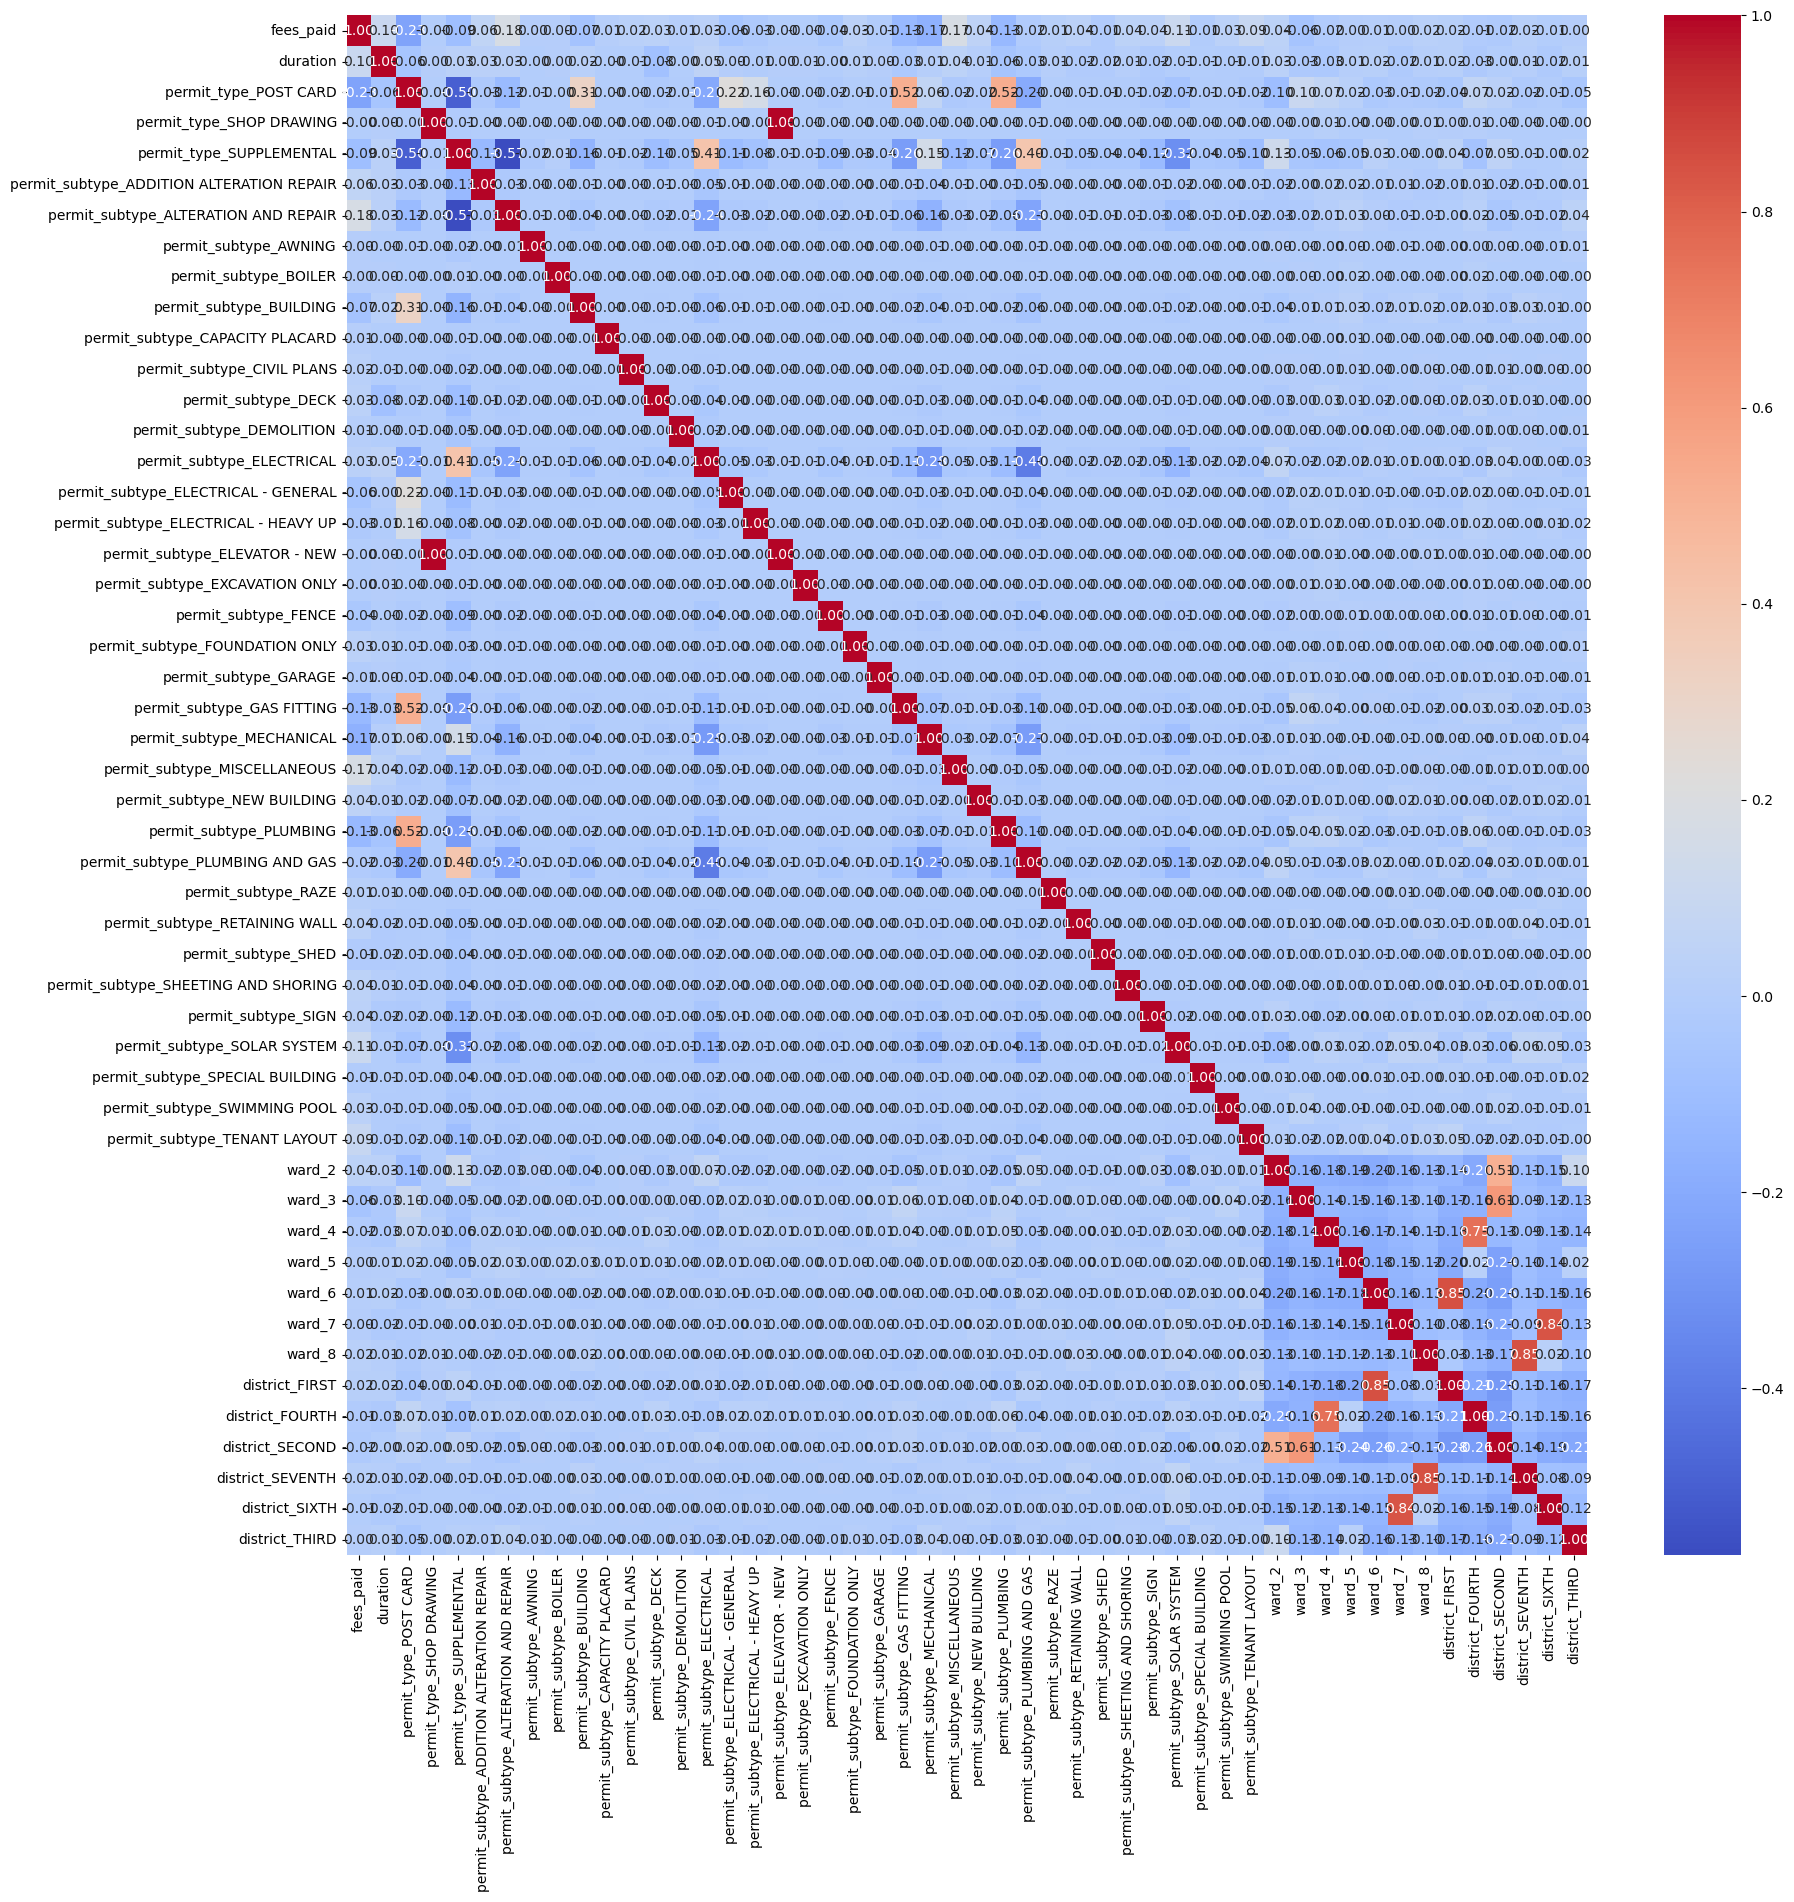

In [768]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

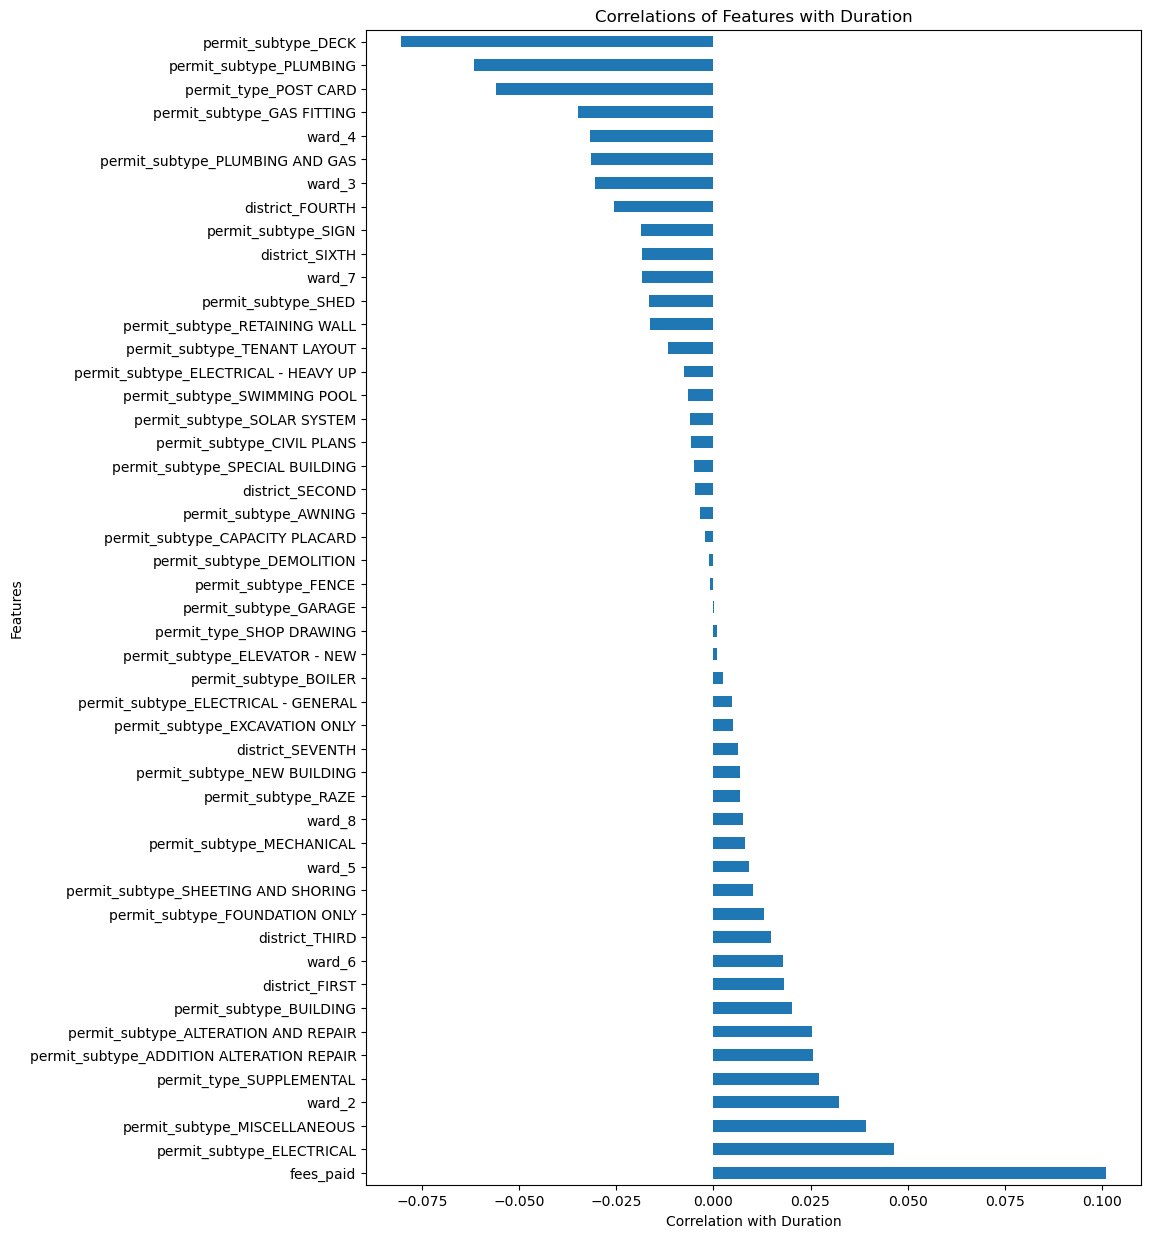

In [769]:
plt.figure(figsize=(10, 15))
correlations_with_duration.drop('duration').plot(kind='barh')
plt.xlabel('Correlation with Duration')
plt.ylabel('Features')
plt.title('Correlations of Features with Duration')
plt.show()

In [770]:
print(correlations_with_duration)

duration                                     1.000000
fees_paid                                    0.101082
permit_subtype_ELECTRICAL                    0.046407
permit_subtype_MISCELLANEOUS                 0.039266
ward_2                                       0.032301
permit_type_SUPPLEMENTAL                     0.027201
permit_subtype_ADDITION ALTERATION REPAIR    0.025623
permit_subtype_ALTERATION AND REPAIR         0.025285
permit_subtype_BUILDING                      0.020107
district_FIRST                               0.018246
ward_6                                       0.017807
district_THIRD                               0.014859
permit_subtype_FOUNDATION ONLY               0.013026
permit_subtype_SHEETING AND SHORING          0.010064
ward_5                                       0.009153
permit_subtype_MECHANICAL                    0.008231
ward_8                                       0.007632
permit_subtype_RAZE                          0.006943
permit_subtype_NEW BUILDING 

In [771]:
print("Feature\t\t\tCorrelation with Duration")
print("-" * 40)
for index, value in correlations_with_duration.items():
    print(f"{index: <25} {value:.2f}")


Feature			Correlation with Duration
----------------------------------------
duration                  1.00
fees_paid                 0.10
permit_subtype_ELECTRICAL 0.05
permit_subtype_MISCELLANEOUS 0.04
ward_2                    0.03
permit_type_SUPPLEMENTAL  0.03
permit_subtype_ADDITION ALTERATION REPAIR 0.03
permit_subtype_ALTERATION AND REPAIR 0.03
permit_subtype_BUILDING   0.02
district_FIRST            0.02
ward_6                    0.02
district_THIRD            0.01
permit_subtype_FOUNDATION ONLY 0.01
permit_subtype_SHEETING AND SHORING 0.01
ward_5                    0.01
permit_subtype_MECHANICAL 0.01
ward_8                    0.01
permit_subtype_RAZE       0.01
permit_subtype_NEW BUILDING 0.01
district_SEVENTH          0.01
permit_subtype_EXCAVATION ONLY 0.01
permit_subtype_ELECTRICAL - GENERAL 0.00
permit_subtype_BOILER     0.00
permit_subtype_ELEVATOR - NEW 0.00
permit_type_SHOP DRAWING  0.00
permit_subtype_GARAGE     0.00
permit_subtype_FENCE      -0.00
permit_subtype_DEMO

In [772]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [773]:
building_permits = building_permits_encoded

In [774]:
a = [

]


In [775]:
# Split the data into training and testing sets
X = building_permits.drop(columns=['duration', 'start_date', 'permit_id', 'completion_date',
    "start_date",
    "permit_id",
    "fees_paid",
    "completion_date",
    "latitude",
    "longitude",
    "duration",
    "permit_type_POST CARD",
    "permit_type_SHOP DRAWING",
    "permit_type_SUPPLEMENTAL",
    "district_FIRST",
    "district_FOURTH",
    "district_SECOND",
    "district_SEVENTH",
    "district_SIXTH",
    "district_THIRD",
                                   ])
y = building_permits['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [776]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Performance Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression: MSE =", mse_lr, ", R2 =", r2_lr)


Linear Regression: MSE = 181040.01737485453 , R2 = 0.01671827074537524


In [777]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Performance Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest: MSE =", mse_rf, ", R2 =", r2_rf)


Random Forest: MSE = 180901.43101808056 , R2 = 0.017470974122870353


In [779]:
import xgboost as xgb

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Performance Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost: MSE =", mse_xgb, ", R2 =", r2_xgb)

XGBoost: MSE = 180642.14671648198 , R2 = 0.01887922363665895
